# Predictin heart disease using machine learning

This notebook looks into using various Python-based machine learning and data scince libraris in an attempt to build a machine learning model capable of predicting whether or not a person has heart disease based on their medical attributes.

## 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. <br>

https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> The model should reach 95% accuracy at predicting whether or not a patient has heart disease.

## 4. Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
      - can range from mild symptoms to severe problems
      - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
      - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    "- 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [2]:
# Regular EDA (Explorotory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display the plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

## Load Data

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

The goal here is to find out more about the data. <br>

<span style="color: red">Need paraphrasing</span>

1. What questions are we trying to solve?
2. What kind of data do we have and how to treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about it?
5. How can we add, change or remove features to get more out of the data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# How many patients have heart dieases and how many do not
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

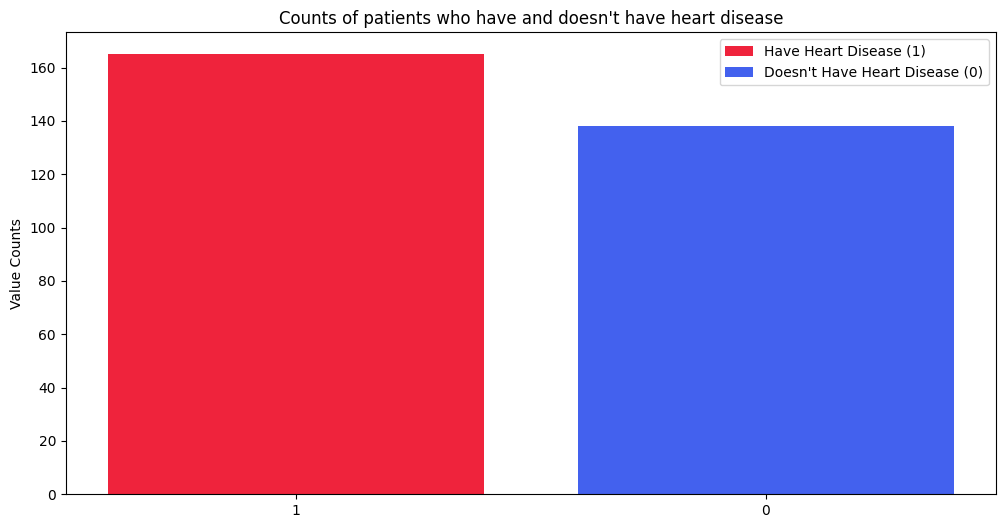

In [30]:
fig, ax = plt.subplots(figsize = (12, 6))

# df['target'].value_counts().plot(kind = "bar", color = ["orange", "blue"])

to_string = lambda x: str(x)

values = df["target"].unique()
cat_values = np.array([to_string(value) for value in values])
value_counts = df["target"].value_counts()
bar_labels = ["Have Heart Disease (1)", "Doesn't Have Heart Disease (0)"]
bar_colors = ["#ef233c", "#4361ee"]

ax.bar(cat_values, value_counts, label = bar_labels, color = bar_colors, )

ax.set_ylabel("Value Counts")
ax.set_title("Counts of patients who have and doesn't have heart disease")
ax.legend()

plt.show()



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
# Check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [31]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [46]:
print("""
The data has more male records than females records (approximatelty, the number of males is double the number of females)
""")


The data has more male records than females records (approximatelty, the number of males is double the number of females)



In [40]:
# Compare target column with sex column
ctab = pd.crosstab(df.target, df.sex)
ctab

sex,0,1
target,,
0,24,114
1,72,93


In [44]:
print(f"""
      Based on this data set, {ctab[0][1] / (ctab[0][1] + ctab[0][0]) * 100}% of females have heart disease.
    """)


      based on this data set, 75.0% of females have heart disease.
    


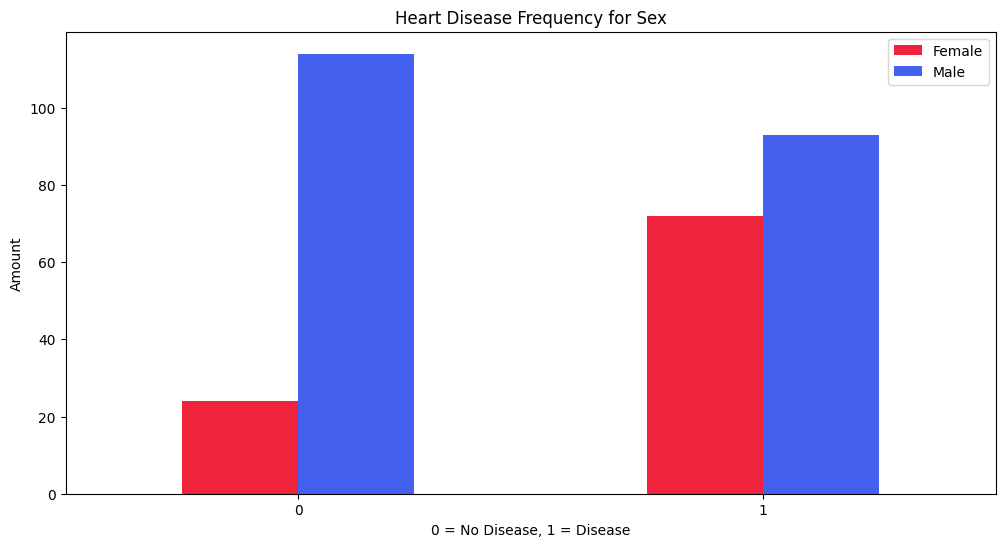

In [81]:
# Visualizing the crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (12, 6),
                                    color = bar_colors,
                                  )

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

In [63]:
print(f"""
  There are more males who have heart disease than females. However, when comparing the ratio of those who have heaer disease and those who who doesn't for each sex,
  the ratio of females is higher than males by {ctab[0][1] / (ctab[0][1] + ctab[0][0]) * 100 - ctab[1][1] / (ctab[1][1] + ctab[1][0]) * 100:.2f}%
""")


  There are more males who have heart disease than females. However, when comparing the ratio of those who have heaer disease and those who who doesn't for each sex,
  the ratio of females is higher than males by 30.07%



### Age vs. Max Heart Rate for Heart Disease

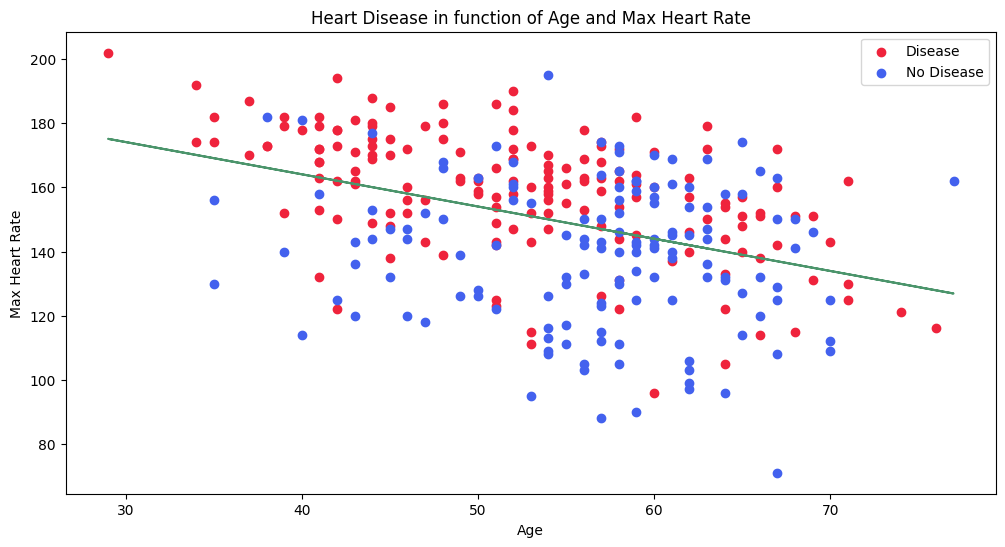

In [114]:
from scipy import stats

colors = ["#ef233c", "#4361ee", "#4c956c"]

plt.figure(figsize = (12, 6))

# Scatter with positive records
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],
            color = colors[0]
            )

# Scatter with negative records
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
            color = colors[1]
            )

# Adding some info to the plot
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Adding a seperation line
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df.age, df.thalach)

# plt.plot(df.age, slope * df.age + intercept, linestyle = (0, (3, 10, 1, 10)), color = colors[2]);
plt.plot(df.age, slope * df.age + intercept, linestyle = "solid", color = colors[2]);



### Age Distribution

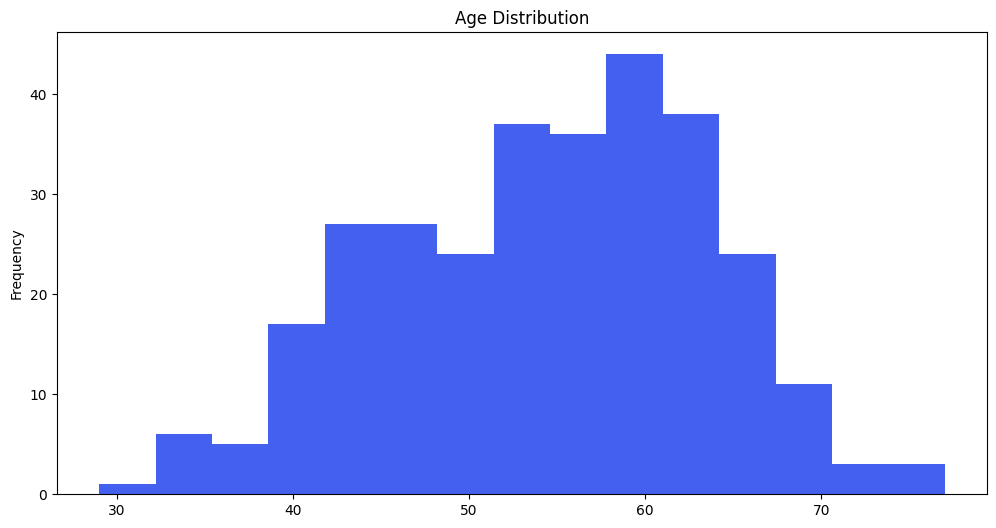

In [115]:
# Checking the distribtion of the age
df.age.plot.hist(figsize = (12, 6), color = colors[1], bins = 15);

plt.title("Age Distribution");

### Heart Disease Frequency per Chest Pain Type
- cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [116]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

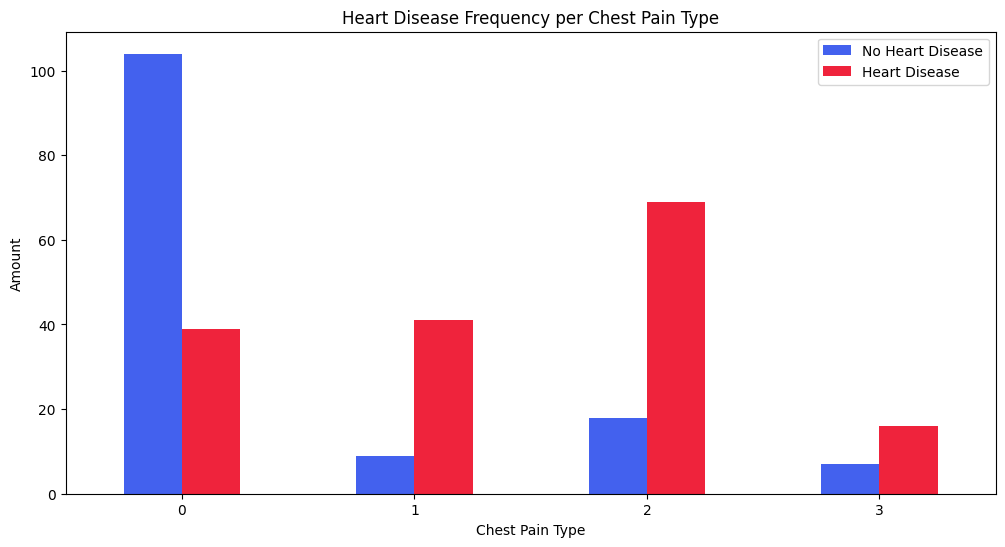

In [119]:
# Visualizing the crosstab
pd.crosstab(df.cp, df.target).plot(figsize = (12, 6),
                                    kind = "bar",
                                    color = [colors[1], colors[0]]
                                    )
# Add some info
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation = 0)

In [120]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


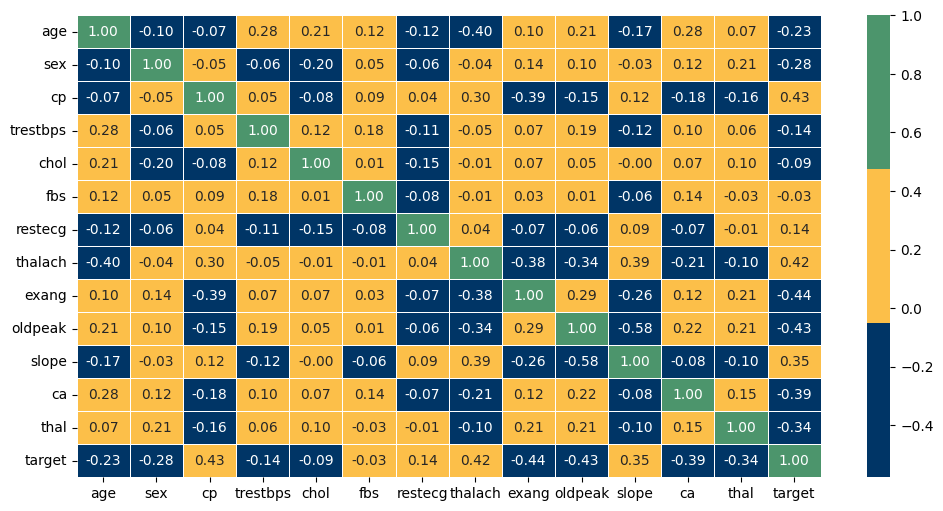

In [123]:
# Visualizing the correlation matrix

cmap_colors = ["#003566", "#fcbf49", "#4c956c", ]

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (12, 6))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = cmap_colors,
                 )

In [128]:
print("""
  According to the correlation matrix, as the chest pain type goes up, the target coulumn increases (higher chance that the person has heart disease)
""")


  According to the correlation matrix, as the chest pain type goes up, the target coulumn increases (higher chance that the person has heart disease)



## 5. Modelling

In [129]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
# Split the data into X and y
X = df.drop("target", axis = 1)

y = df["target"]

# X
# y

In [144]:
# Split the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

#len(X_train), len(y_train), len(X_test), len(y_test)


In [146]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dictionary of different Scikit-Learn machine learning models
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: test labels
  """
  # Set random seed
  np.random.seed(42)
  # Making a list to keep model scores
  models_scores = {}
  # Loop through the models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and add its score to models_scores
    models_scores[name] = model.score(X_test, y_test)

  return models_scores